In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from models.mcp import OOBConformalClassifier
from plotly_utils import efficiency_curve, reliability_curve, histogram, confusion_matrix, beta_pdf_with_cdf_fill
from sklearn.metrics import confusion_matrix as sklearn_confusion_matrix

In [2]:
weights = [0.2, 0.8]

X, y = make_classification(
    n_samples=100000, 
    n_features=20, 
    n_informative=2,      
    weights=weights, 
    random_state=42,
    n_redundant=2)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [4]:
rf = RandomForestClassifier(random_state=42, oob_score=True, n_jobs=-1, class_weight="balanced")
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, oob_score=True,
                       random_state=42)

In [ ]:
clf = OOBConformalClassifier(rf)
clf.fit(y_train)

NameError: name 'WrapperOOBBinaryConformalClassifier' is not defined

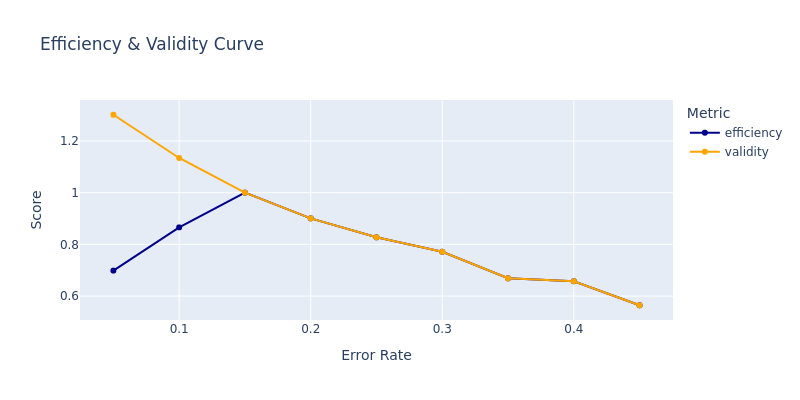

In [47]:
efficiency_curve(clf, X_test, "png")

In [48]:
clf.calibrate_alpha(X_calib, y_calib)


In [49]:
clf.alpha

0.09

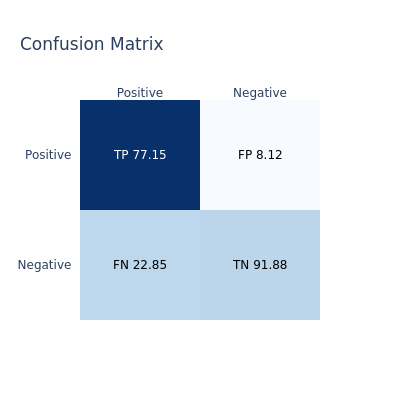

In [50]:
confusion_matrix(clf, X_test, y_test, fig_type="png")

Random Forest

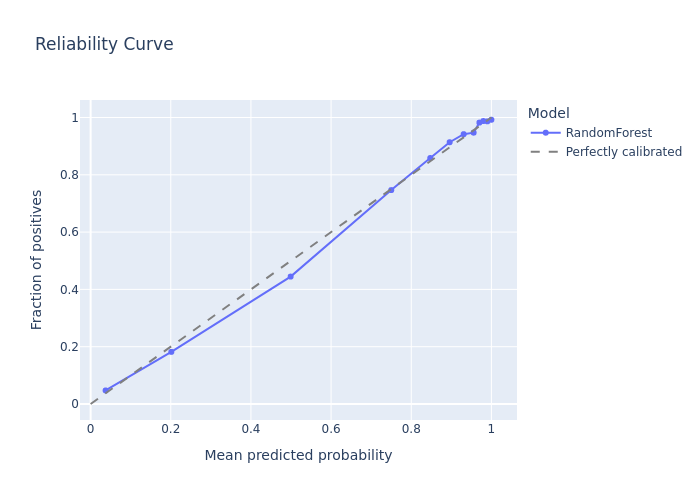

In [51]:
reliability_curve(clf.learner, X_test, y_test, 15,  "png")

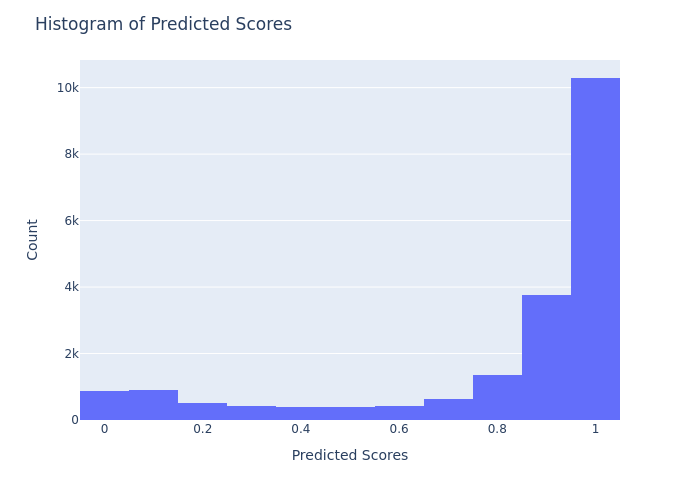

In [52]:
histogram(clf.learner, X_test, 15, "png")

Venn Abers

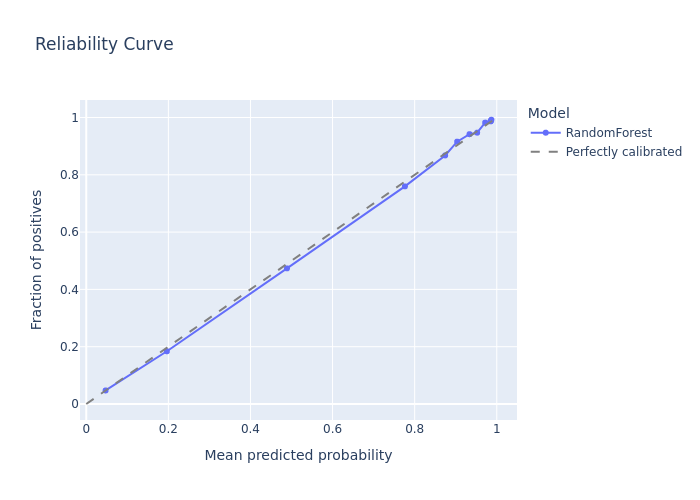

In [53]:
reliability_curve(clf, X_test, y_test, 15, "png")

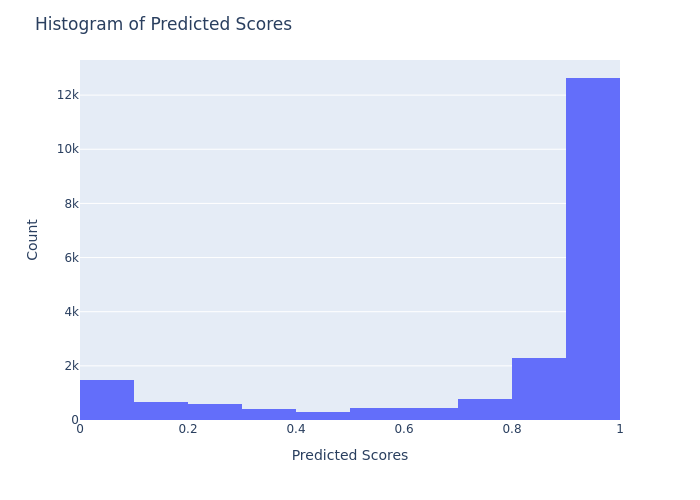

In [54]:
histogram(clf, X_test, 15, "png")

Alpha - 0.05

In [55]:
clf.evaluate(X_test, y_test, alpha=0.05)

,one_c,avg_c,empty,error,log_loss,brier_loss,ece,empirical_coverage,generalization,auc,precision,recall,alpha
0,0.699,1.301,0.0,0.043,0.233,0.067,0.004,0.982,0.007,0.938,0.983,0.634,0.05


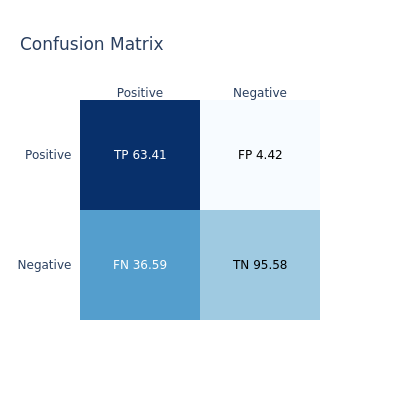

In [56]:
confusion_matrix(clf, X_test, y_test, alpha=0.05, fig_type="png")

Alpha - 0.10

In [57]:
clf.evaluate(X_test, y_test, alpha=0.10)

,one_c,avg_c,empty,error,log_loss,brier_loss,ece,empirical_coverage,generalization,auc,precision,recall,alpha
0,0.866,1.134,0.0,0.084,0.233,0.067,0.004,0.951,0.007,0.938,0.974,0.772,0.1


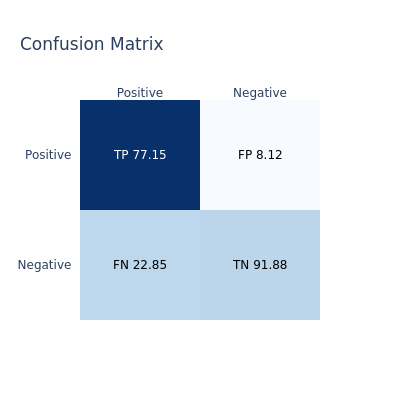

In [58]:
confusion_matrix(clf, X_test, y_test, alpha=0.10, fig_type="png")

In [59]:
tn, fp, fn, tp = sklearn_confusion_matrix(y_test, clf.predict(X_test)).ravel()

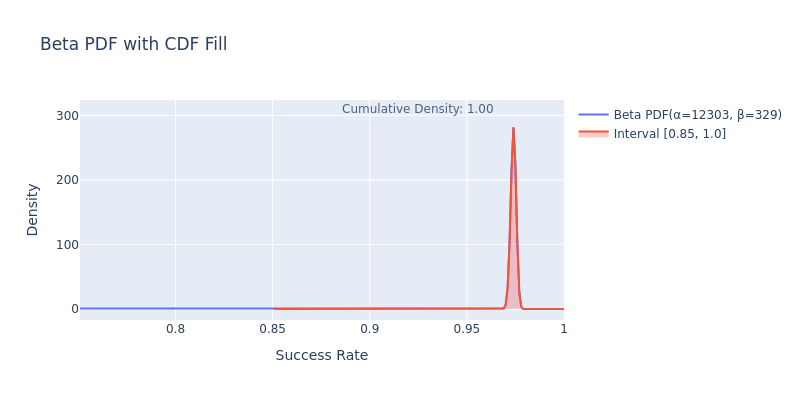

In [60]:
beta_pdf_with_cdf_fill(tp, fp, start=0.85, fig_type="png")

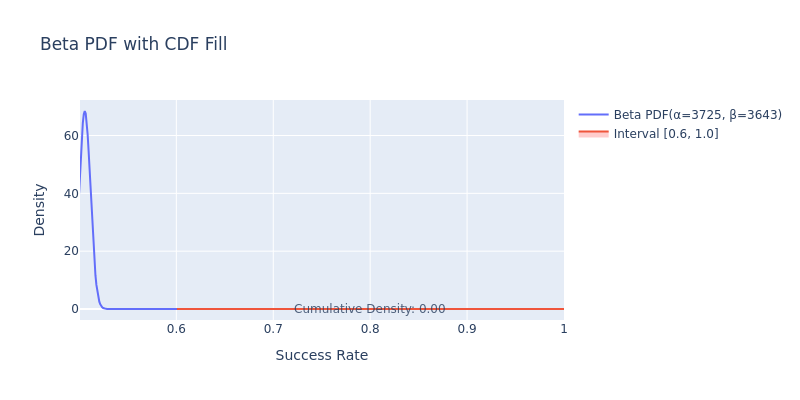

In [65]:
beta_pdf_with_cdf_fill(tn, fn, start=0.6, fig_type="png")